### IMPORTING ALL THE NECESSARIES LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
#reading our dataset and creating a dataframe
movie_df = pd.read_csv(r"IMDB-Movie-Data.csv")

In [3]:
 movie_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
movie_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### Lets check how many movies were released each year in our dataset

Following are number of movies released per year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: Year, dtype: int64


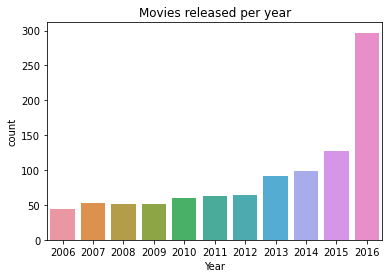

In [5]:
print('Following are number of movies released per year')
print(movie_df.Year.value_counts())
plt.title("Movies released per year")
sns.countplot(x=movie_df['Year'],data =movie_df);

### We can see, the highest number of releases were in 2016 which are 297 followed by 2015. The Number of movies released each year kept on increasing

## Now, let us check the average revenue generated each year 

In [8]:
movie_df.groupby("Year")['Revenue (Millions)'].sum()

Year
2006     3624.46
2007     4306.23
2008     5053.22
2009     5292.26
2010     5989.65
2011     5431.96
2012     6910.29
2013     7666.72
2014     7997.40
2015     8854.12
2016    11211.65
Name: Revenue (Millions), dtype: float64

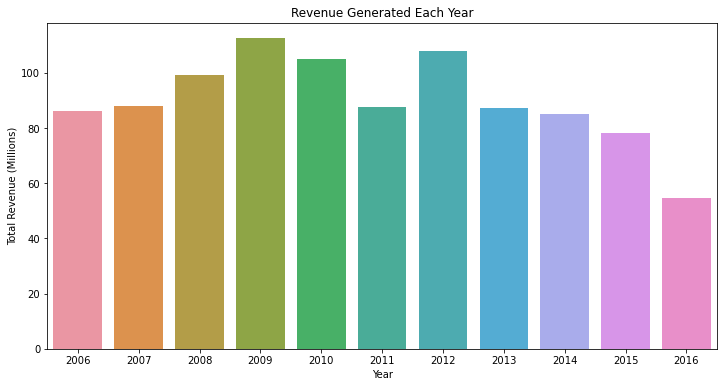

In [11]:

revenue_by_year = movie_df.groupby('Year')['Revenue (Millions)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Revenue (Millions)', data=revenue_by_year)
plt.title('Revenue Generated Each Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue (Millions)')
plt.show()


### Let us look at the longest movies by duration (Runtime)

In [12]:
top_runtime_movies = movie_df.nlargest(10, 'Runtime (Minutes)')

In [13]:
# Display the top 5 movies with highest runtime
print("Top 5 Movies with Highest Runtime:")
print(top_runtime_movies[['Title', 'Runtime (Minutes)']])


Top 5 Movies with Highest Runtime:
                                        Title  Runtime (Minutes)
828                                Grindhouse                191
88                          The Hateful Eight                187
82                    The Wolf of Wall Street                180
311                            La vie d'Adèle                180
965                             Inland Empire                180
267                               Cloud Atlas                172
430                                  3 Idiots                170
36                               Interstellar                169
75   Pirates of the Caribbean: At World's End                169
271         The Hobbit: An Unexpected Journey                169


In [14]:
long_runtime_movies = movie_df[movie_df['Runtime (Minutes)'] > 150].sort_values(by = 'Runtime (Minutes)', ascending = False)
print("Movies with Runtime of more than 150 Minutes:")
print(long_runtime_movies[['Title', 'Runtime (Minutes)']])

Movies with Runtime of more than 150 Minutes:
                                                 Title  Runtime (Minutes)
828                                         Grindhouse                191
88                                   The Hateful Eight                187
965                                      Inland Empire                180
82                             The Wolf of Wall Street                180
311                                     La vie d'Adèle                180
267                                        Cloud Atlas                172
430                                           3 Idiots                170
271                  The Hobbit: An Unexpected Journey                169
75            Pirates of the Caribbean: At World's End                169
36                                        Interstellar                169
425                The Curious Case of Benjamin Button                166
126                    Transformers: Age of Extinction            

### Counting movies for each genre type

In [15]:
movie_df.groupby("Genre")['Genre'].count()

Genre
Action                         2
Action,Adventure               3
Action,Adventure,Biography     2
Action,Adventure,Comedy       14
Action,Adventure,Crime         6
                              ..
Romance,Sci-Fi,Thriller        1
Sci-Fi                         2
Sci-Fi,Thriller                1
Thriller                       9
Thriller,War                   1
Name: Genre, Length: 207, dtype: int64

## Identifying the top Directors based on the number of movies

In [16]:
#counting the count of directors
director_movie_counts = movie_df['Director'].value_counts()

#value_counts count the number of occurences for each unique values

In [17]:
director_movie_counts

Ridley Scott          8
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
                     ..
Philippe Falardeau    1
Stephen Gaghan        1
Ido Fluk              1
Lee Unkrich           1
Farren Blackburn      1
Name: Director, Length: 644, dtype: int64

In [18]:
# Display the top directors based on the number of movies
top_directors_by_movies = director_movie_counts.head(10)
print("Top Directors based on Number of Movies:")
print(top_directors_by_movies)

Top Directors based on Number of Movies:
Ridley Scott          8
Michael Bay           6
David Yates           6
Paul W.S. Anderson    6
M. Night Shyamalan    6
David Fincher         5
Christopher Nolan     5
Denis Villeneuve      5
Woody Allen           5
Martin Scorsese       5
Name: Director, dtype: int64


### Identifying top Directors based on the Ratings 

In [19]:
director_avg_rating = movie_df.groupby('Director')['Rating'].mean()
director_avg_rating.head(10)

Director
Aamir Khan             8.5
Abdellatif Kechiche    7.8
Adam Leon              6.5
Adam McKay             7.0
Adam Shankman          6.3
Adam Wingard           5.9
Afonso Poyart          6.4
Aisling Walsh          7.8
Akan Satayev           6.3
Akiva Schaffer         6.7
Name: Rating, dtype: float64

### Identifying top Actors by the number of movies they have done.

In [20]:
all_actors = movie_df['Actors'].str.split(', ', expand=True)

# Reshape the DataFrame to have one actor per row
all_actors = all_actors.melt(value_name='Actor').dropna()['Actor']

# Count the number of movies for each actor
actor_movie_counts = all_actors.value_counts()

# Display the top actors based on the number of movies
top_actors_by_movies = actor_movie_counts.head(10)
print("Top Actors based on Number of Movies:")
print(top_actors_by_movies)

Top Actors based on Number of Movies:
Mark Wahlberg         15
Hugh Jackman          13
Christian Bale        13
Brad Pitt             13
Michael Fassbender    12
Tom Hardy             12
Johnny Depp           11
Jake Gyllenhaal       11
Channing Tatum        11
Robert Downey Jr.     11
Name: Actor, dtype: int64


### Identifying Top Actors based on the Good Movies they have done(Ratings)

In [21]:
actor_director_ratings = movie_df.groupby(['Actors', 'Director'])['Rating'].mean().reset_index()

# Group by actor and calculate the average rating for each
actor_avg_ratings = actor_director_ratings.groupby('Actors')['Rating'].mean()

# Display the top actors based on average ratings
top_actors_by_ratings = actor_avg_ratings.sort_values(ascending=False).head(10)
print("Top Actors based on Average Ratings:")
print(top_actors_by_ratings)

Top Actors based on Average Ratings:
Actors
Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine              9.0
Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page, Ken Watanabe      8.8
Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,Sanya Malhotra           8.8
François Cluzet, Omar Sy, Anne Le Ny, Audrey Fleurot                   8.6
Matthew McConaughey, Anne Hathaway, Jessica Chastain, Mackenzie Foy    8.6
Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Narita, Aoi Yuki             8.6
Darsheel Safary, Aamir Khan, Tanay Chheda, Sachet Engineer             8.5
Miles Teller, J.K. Simmons, Melissa Benoist, Paul Reiser               8.5
Christian Bale, Hugh Jackman, Scarlett Johansson, Michael Caine        8.5
Leonardo DiCaprio, Matt Damon, Jack Nicholson, Mark Wahlberg           8.5
Name: Rating, dtype: float64


### Checking the Distribution of the Revenue

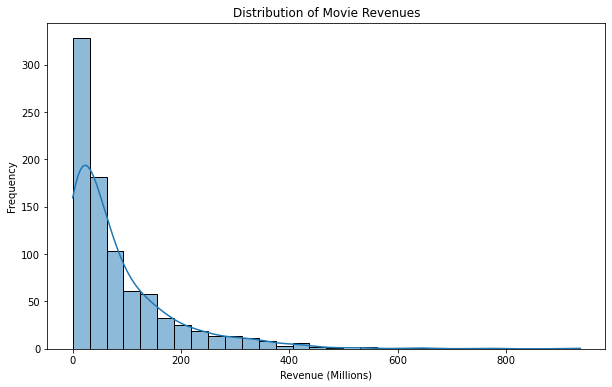

In [22]:
revenue_column = 'Revenue (Millions)'

# Plotting the distribution of revenues
plt.figure(figsize=(10, 6))
sns.histplot(movie_df[revenue_column].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Revenues')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Frequency')
plt.show()

## Identifying the relation between Revenue and the ratings

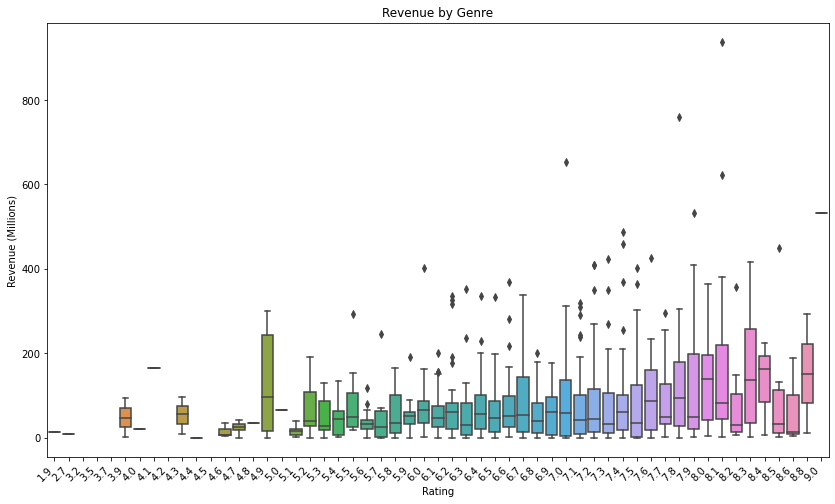

In [23]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Rating', y=revenue_column, data=movie_df)
plt.title('Revenue by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

### Plotting a Heat Map to perform the correlation analysis between Rating, Votes, Duartion, Revenue and Metascore

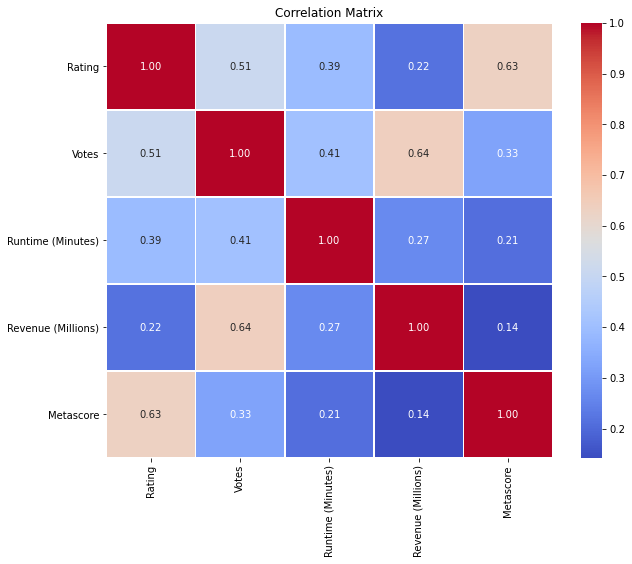

In [24]:
numerical_columns = ['Rating', 'Votes', 'Runtime (Minutes)', 'Revenue (Millions)', 'Metascore']

# Calculate correlation matrix
correlation_matrix = movie_df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Identifying Top Rated movies by Ratings

In [25]:
# Sort the DataFrame by 'Rating' in descending order
top_rated_movies = movie_df.sort_values(by='Rating', ascending=False).head(10)

# Display the top-rated movies
print("Top Rated Movies:")
print(top_rated_movies[['Title', 'Rating','Genre']])


Top Rated Movies:
                Title  Rating                    Genre
54    The Dark Knight     9.0       Action,Crime,Drama
80          Inception     8.8  Action,Adventure,Sci-Fi
117            Dangal     8.8   Action,Biography,Drama
36       Interstellar     8.6   Adventure,Drama,Sci-Fi
96      Kimi no na wa     8.6  Animation,Drama,Fantasy
249  The Intouchables     8.6   Biography,Comedy,Drama
133          Whiplash     8.5              Drama,Music
64       The Prestige     8.5     Drama,Mystery,Sci-Fi
99       The Departed     8.5     Crime,Drama,Thriller
991  Taare Zameen Par     8.5       Drama,Family,Music


### Identifying Top Movies based on the Revenue they have generated

In [26]:
top_revenue_movies = movie_df.sort_values(by='Revenue (Millions)', ascending=False).head(10)

# Display the top revenue movies
print("Top Revenue Movies:")
print(top_revenue_movies[['Title', 'Revenue (Millions)']])

Top Revenue Movies:
                                          Title  Revenue (Millions)
50   Star Wars: Episode VII - The Force Awakens              936.63
87                                       Avatar              760.51
85                               Jurassic World              652.18
76                                 The Avengers              623.28
54                              The Dark Knight              533.32
12                                    Rogue One              532.17
119                                Finding Dory              486.29
94                      Avengers: Age of Ultron              458.99
124                       The Dark Knight Rises              448.13
578             The Hunger Games: Catching Fire              424.65


### Lets compute the Composite score and list top movies based on that. 

In [27]:
z_score_rating = (movie_df['Rating'] - movie_df['Rating'].mean()) / movie_df['Rating'].std()
z_score_revenue = (movie_df['Revenue (Millions)'] - movie_df['Revenue (Millions)'].mean()) / movie_df['Revenue (Millions)'].std()

In [28]:
movie_df['Composite_Score'] = z_score_rating + z_score_revenue
movie_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Composite_Score
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,3.879176
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,0.714105
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,1.144348
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,2.318919
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,1.790962


In [29]:
# Sort the DataFrame by 'Composite_Score' in descending order
top_composite_movies = movie_df.sort_values(by='Composite_Score', ascending=False).head(10)

In [30]:
top_composite_movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Composite_Score
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,9.724012
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,7.700992
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,6.769945
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,6.689250
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,5.805650
12,13,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,5.595314
124,125,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,5.416028
688,689,Toy Story 3,"Animation,Adventure,Comedy",The toys are mistakenly delivered to a day-car...,Lee Unkrich,"Tom Hanks, Tim Allen, Joan Cusack, Ned Beatty",2010,103,8.3,586669,414.98,92.0,4.883430
119,120,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0,4.622111
35,36,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147,7.9,411656,408.08,75.0,4.393515


In [31]:
print("Top Movies based on Composite Score:")
print(top_composite_movies[['Title', 'Composite_Score']])

Top Movies based on Composite Score:
                                          Title  Composite_Score
50   Star Wars: Episode VII - The Force Awakens         9.724012
87                                       Avatar         7.700992
54                              The Dark Knight         6.769945
76                                 The Avengers         6.689250
85                               Jurassic World         5.805650
12                                    Rogue One         5.595314
124                       The Dark Knight Rises         5.416028
688                                 Toy Story 3         4.883430
119                                Finding Dory         4.622111
35                   Captain America: Civil War         4.393515


### Plotting the bar graphs for top movies based on Ratings, Revenue and Composite Score

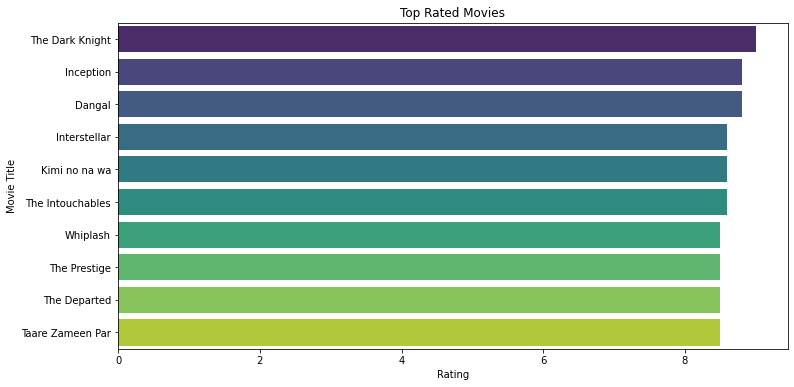

In [32]:
# Bar chart for top-rated movies
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Title', data=top_rated_movies, palette='viridis')
plt.title('Top Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

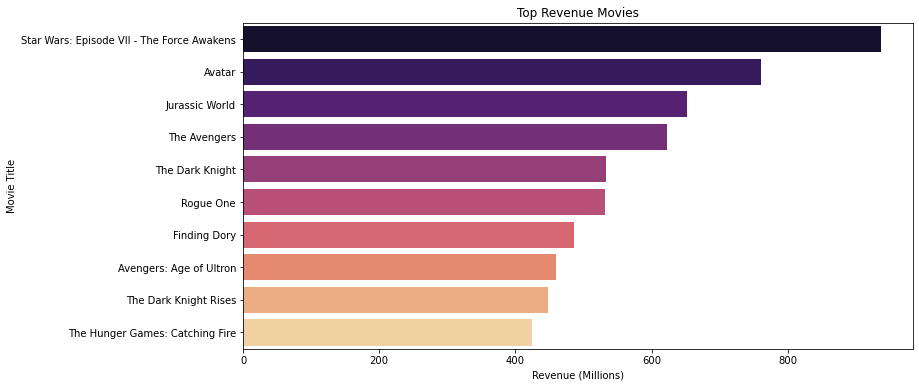

In [33]:
# Bar chart for top revenue movies
plt.figure(figsize=(12, 6))
sns.barplot(x='Revenue (Millions)', y='Title', data=top_revenue_movies, palette='magma')
plt.title('Top Revenue Movies')
plt.xlabel('Revenue (Millions)')
plt.ylabel('Movie Title')
plt.show()

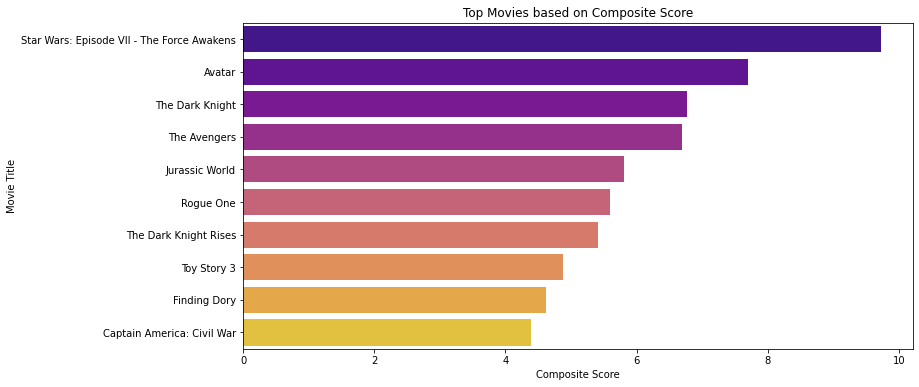

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Composite_Score', y='Title', data=top_composite_movies, palette='plasma')
plt.title('Top Movies based on Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Movie Title')
plt.show()

In [35]:

# Downloading stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Generating Word Cloud based on description and title 

In [36]:

descriptions = movie_df['Description'].dropna()

# Function for text preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply text preprocessing to descriptions
preprocessed_descriptions = descriptions.apply(preprocess_text)

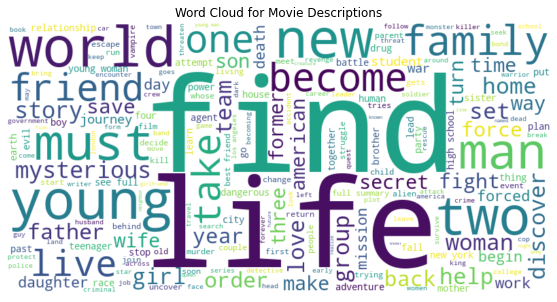

In [37]:
all_descriptions = ' '.join(preprocessed_descriptions)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions')
plt.show()

In [38]:
# Combine preprocessed descriptions with corresponding ratings and revenue
combined_data = pd.DataFrame({'Description': preprocessed_descriptions, 'Rating': movie_df['Rating'], 'Revenue': movie_df['Revenue (Millions)']})

# Function to calculate average rating or revenue for a specific word
def avg_rating_or_revenue_for_word(word):
    word_data = combined_data[combined_data['Description'].str.contains(word)]
    return word_data['Rating'].mean(), word_data['Revenue'].mean()

# Example: Analyze the word 'action'
word_to_analyze = 'mysterious'
avg_rating, avg_revenue = avg_rating_or_revenue_for_word(word_to_analyze)
print(f"Average Rating for '{word_to_analyze}': {avg_rating:.2f}")
print(f"Average Revenue for '{word_to_analyze}': ${avg_revenue:.2f}")


Average Rating for 'mysterious': 6.53
Average Revenue for 'mysterious': $67.38


In [39]:
titles = movie_df['Title'].dropna()

# Function for text preprocessing
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

# Apply text preprocessing to descriptions
preprocessed_titles = titles.apply(preprocess_text)

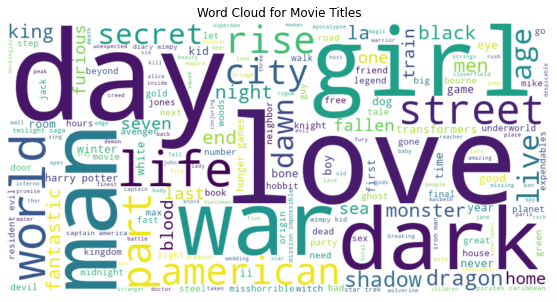

In [40]:
all_titles = ' '.join(preprocessed_titles)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Titles')
plt.show()